<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customizing-Visual-Appearance" data-toc-modified-id="Customizing-Visual-Appearance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Customizing Visual Appearance</a></span><ul class="toc-item"><li><span><a href="#Preliminaries" data-toc-modified-id="Preliminaries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preliminaries</a></span></li><li><span><a href="#Visualizing-weather-station-data" data-toc-modified-id="Visualizing-weather-station-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizing weather station data</a></span></li><li><span><a href="#Types-of-option" data-toc-modified-id="Types-of-option-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Types of option</a></span><ul class="toc-item"><li><span><a href="#Plot-options" data-toc-modified-id="Plot-options-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Plot options</a></span><ul class="toc-item"><li><span><a href="#Aside:-hv.help" data-toc-modified-id="Aside:-hv.help-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Aside: <code>hv.help</code></a></span></li></ul></li><li><span><a href="#Style-Options" data-toc-modified-id="Style-Options-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Style Options</a></span></li></ul></li><li><span><a href="#Switching-to-matplotlib" data-toc-modified-id="Switching-to-matplotlib-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Switching to matplotlib</a></span><ul class="toc-item"><li><span><a href="#The-%output-line-magic" data-toc-modified-id="The-%output-line-magic-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>The <code>%output</code> line magic</a></span></li></ul></li><li><span><a href="#Switching-back-to-bokeh" data-toc-modified-id="Switching-back-to-bokeh-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Switching back to bokeh</a></span></li><li><span><a href="#Onwards" data-toc-modified-id="Onwards-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Onwards</a></span></li></ul></li></ul></div>

<br>
<img src="https://github.com/pyviz/pyviz/raw/master/notebooks/assets/hv_gv_bk_ds_pa.png" width="50%" style="margin: 0px 25%">

# Customizing Visual Appearance

Section 01 focused on specifying elements and simple collections of them.  This section explains how the visual appearance can be adjusted to bring out the most salient aspects of your data, or just to make the style match the overall theme of your document.

## Preliminaries


In the [introduction to elements](./01-introduction-to-elements), ``hv.extension('bokeh')`` was used at the start to load and activate the bokeh plotting extension. In this notebook, we will also briefly use [matplotlib](www.matplotlib.org) which we will load, but not yet activate, by listing it second:



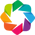

In [1]:
import numpy as np
import pandas as pd 
import holoviews as hv
import warnings
warnings.filterwarnings('ignore')
hv.extension('bokeh', 'matplotlib')

## Visualizing weather station data

In [2]:
df = pd.read_parquet('../datasets/weather_station_data.parquet')
df.head()

date station  max_temp_f  min_temp_f  max_dewpoint_f  min_dewpoint_f  \
0 2000-01-01     CMI        54.0        40.0            48.0           -99.0   
1 2000-01-02     CMI        60.0        36.0            53.0           -99.0   
2 2000-01-03     CMI        48.0        35.0            46.0           -99.0   
3 2000-01-04     CMI        34.0        20.0            31.0           -99.0   
4 2000-01-05     CMI        28.0        19.0            23.0           -99.0   

   precip_in  avg_wind_speed_kts  avg_wind_drct   min_rh   avg_rh   max_rh  \
0       0.00             10.4543        178.361  52.1530  79.7005  92.8002   
1       0.00             14.4997        204.253  60.6015  83.9761  93.1369   
2       0.59             12.9379        340.772  81.4008  92.9263  96.2444   
3       0.00             14.5939        289.829  80.5226  83.5739  88.0248   
4       0.00             11.8946        172.923  77.5292  81.7780  84.7241   

   climo_high_f  climo_low_f  climo_precip_in  year  month  precip_cumsum_in  
0          33.3         18.2             0.09  2000      1              0.00  
1          33.2         18.1             0.09  2000      1              0.00  
2          33.2         18.0             0.09  2000      1              0.59  
3          33.2         17.8             0.09  2000      1              0.59  
4          33.1         17.7             0.09  2000      1              0.59

In [3]:
# select data for Midway station only 
midway = df[df['station'] == 'MDW'].set_index('date')

# Compute a 7-day rolling(moving) average 
midway = midway.rolling(window=7, center=True, min_periods=4).mean().reset_index()
midway.head()

date station  max_temp_f  min_temp_f  max_dewpoint_f  min_dewpoint_f  \
0 2000-01-01     MDW   46.500000   33.250000       40.250000           -99.0   
1 2000-01-02     MDW   42.600000   29.800000       36.400000           -99.0   
2 2000-01-03     MDW   42.666667   29.333333       35.500000           -99.0   
3 2000-01-04     MDW   40.857143   28.428571       33.714286           -99.0   
4 2000-01-05     MDW   40.285714   27.000000       33.428571           -99.0   

   precip_in  avg_wind_speed_kts  avg_wind_drct     min_rh     avg_rh  \
0   0.040000           10.673092      178.31205  61.143750  80.686975   
1   0.032000           10.936654      181.52424  62.579860  80.065720   
2   0.026667           10.823228      193.79370  61.699583  78.843200   
3   0.022857           10.589186      200.06960  58.426500  75.625143   
4   0.028571           11.077173      203.42060  59.424114  76.566229   

      max_rh  climo_high_f  climo_low_f  climo_precip_in    year  month  \
0  93.114325     31.850000    18.950000         0.077500  2000.0    1.0   
1  92.032040     31.800000    18.900000         0.078000  2000.0    1.0   
2  90.856833     31.766667    18.833333         0.076667  2000.0    1.0   
3  87.740571     31.728571    18.771429         0.077143  2000.0    1.0   
4  88.773486     31.657143    18.671429         0.075714  2000.0    1.0   

   precip_cumsum_in  
0          0.080000  
1          0.096000  
2          0.106667  
3          0.114286  
4          0.142857

In [4]:
midway.tail()

date station  max_temp_f  min_temp_f  max_dewpoint_f  \
6569 2017-12-27     MDW   15.142857    4.428571        6.985714   
6570 2017-12-28     MDW   13.857143    1.714286        3.957143   
6571 2017-12-29     MDW   12.500000    1.333333        2.800000   
6572 2017-12-30     MDW   13.600000    1.800000        4.780000   
6573 2017-12-31     MDW   15.000000    3.000000        7.250000   

      min_dewpoint_f  precip_in  avg_wind_speed_kts  avg_wind_drct     min_rh  \
6569       -4.271429   0.014329            8.694894     277.758286  52.280671   
6570       -6.842857   0.002900            8.802311     277.775571  51.727871   
6571       -6.650000   0.003367            8.183180     279.046167  52.254517   
6572       -5.780000   0.004040            8.052986     277.914800  53.333480   
6573       -4.475000   0.005050            8.266233     270.864750  54.921825   

         avg_rh     max_rh  climo_high_f  climo_low_f  climo_precip_in  \
6569  67.222643  80.044843     32.585714    19.928571         0.072857   
6570  65.060243  77.175614     32.457143    19.757143         0.074286   
6571  65.285550  76.075950     32.383333    19.666667         0.073333   
6572  66.509840  78.251620     32.320000    19.580000         0.074000   
6573  67.847675  79.860000     32.250000    19.500000         0.075000   

        year  month  precip_cumsum_in  
6569  2017.0   12.0        669.579857  
6570  2017.0   12.0        669.582757  
6571  2017.0   12.0        669.584200  
6572  2017.0   12.0        669.586220  
6573  2017.0   12.0        669.589250

In [5]:
curves = hv.Curve(midway, 'date', 'min_temp_f', label='Max Temp', group='MDW') * \
         hv.Curve(midway, 'date', 'max_temp_f', label='Min Temp', group='MDW')
curves 

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)

## Types of option 

If we want to change the appearance of what we can already see in the plot, we're no longer focusing on the data and metadata stored in the elements, but about details of the presentation.  Details specific to the final plo tare handled by the separate "options" system, not the element objects.  HoloViews allows you to set three types of options:

* **plot options**: Options that tell *HoloViews* how to *construct* the plot.
* **style options**: Options that tell the underlying *plotting extension* (Bokeh, matplotlib, etc.) how to *style* the plot
* **normalization options**: Options that tell *HoloViews* how to *normalize* the various elements in the plot against each other (not covered in this tutorial)


### Plot options

We noted that the data is too compressed in the x direction. Let us fix
that by specifying the ``width`` plot option:

In [6]:
%%opts Curve [width=900]
curves 

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)

The top line uses a special IPython/Jupyter syntax called the ``%%opts`` *cell magic* to specify the ``width`` plot option for all [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) objects in this cell.  ``%%opts`` accepts a simple specification where we pass the ``width=900`` keyword argument to  [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) as a plot option (denoted by the *square brackets*).

Of course, there are other ways of applying options in HoloViews that do not require this IPython-specific syntax, but for this tutorial, we will only be covering the more-convenient syntax by using a holoviews extension module called **[holoext](https://github.com/ahuang11/holoext)** . You can read about the alternative approaches in the [user guide](http://holoviews.org/user_guide/Customizing_Plots.html).

In [7]:
from holoext.bokeh import Mod
Mod(width=900).apply(curves)

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)

In [8]:
# Exercise: Try setting the height plot option of the Curve above.

In [9]:
# Exercise: Try disabling the boolean show_grid plot option for the curve above

In [10]:
# Exercise: Try set the x-axis label rotation (in degrees) with the xrotation plot option

To find out which options you can set with holoext, here is the docstring of the `Mod()` module:


![](https://i.imgur.com/4vqcNOl.png)

You should be able to get this docstring by doing the following:

`Mod()` + `shift` + `tab`

#### Aside: ``hv.help``

Tab completion helps discover what keywords are available but you can get more complete help using the ``hv.help`` utility. For instance, to learn more about the options for ``hv.Curve`` run ``hv.help(hv.Curve)``:

In [11]:
# hv.help(hv.Curve)

### Style Options

The plot options earlier instructed HoloViews to build a plot 900 pixels wide, when rendered with the Bokeh plotting extension. Now let's specify that the Bokeh glyph should be 'lightseagreen', 'coral' and slightly thicker, which is information passed on directly to Bokeh (making it a style option):

In [12]:
%%opts Curve (color=Cycle(values=['lightseagreen', 'coral']) line_width=2, line_dash='dotdash')
curves

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)

## Switching to matplotlib

Let us now view our curve with matplotlib using the ``%%output`` cell magic:

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)
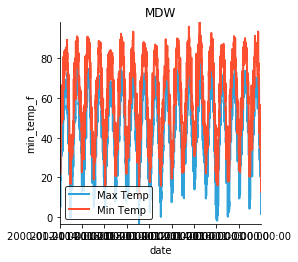

In [13]:
%%output backend='matplotlib'
curves

All our options are gone! This is because the options are associated with the corresponding plotting extension---if you switch back to 'bokeh', the options will be applicable again. In general, options have to be specific to backends; e.g. the ``line_width`` style option accepted by Bokeh is called ``linewidth`` in matplotlib:

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)
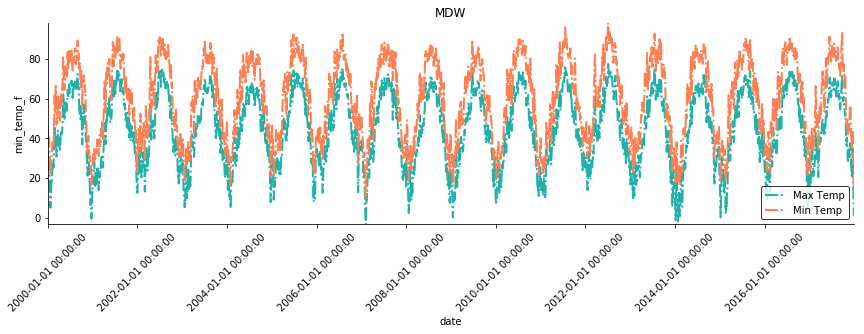

In [14]:
%%output backend='matplotlib'
%%opts Curve [aspect=4 fig_size=400 xrotation=45] (color=Cycle(values=['lightseagreen', 'coral']) linewidth=2 linestyle='-.')
curves


### The ``%output`` line magic

In the two cells above we repeated ``%%output backend='matplotlib'`` to use matplotlib to render those two cells. Instead of repeating ourselves with the cell magic, we can use a "line magic" (similar syntax to the cell magic but with one ``%``) to set things globally. Let us switch to matplotlib with a line magic and specify that we want SVG output:

In [15]:
%output backend='matplotlib' fig='svg'

Unlike the cell magic, the line magic doesn't need to be followed by any expression and can be used anywhere in the notebook. Both the ``%output`` and ``%opts`` line magics set things globally so it is recommended you declare them at the top of your notebooks. Now let us look at the SVG matplotlib output we requested:


In [16]:
%%opts Curve [aspect=4 fig_size=400 xrotation=45] (color=Cycle(values=['lightseagreen', 'coral']) linewidth=2 linestyle='-.')
curves

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)

In [17]:
# Exercise: Verify for yourself that the output above is SVG and not PNG
# You can do this by right-clicking above 
# then selecting 'Open Image in a new Tab' (Chrome) or 'View Image' (Firefox)

 ## Switching back to bokeh

In previous releases of HoloViews, it was typical to switch to matplotlib in order to export to PNG or SVG, because Bokeh did not support these file formats. Since [Bokeh 0.12.6](https://bokeh.github.io/blog/2017/6/13/release-0-12-6/) we can now easily use HoloViews to export Bokeh plots to a PNG file, as we will now demonstrate:


In [18]:
%output backend='bokeh'

By passing ``fig='png'`` and a ``filename='midway_temperature'`` to ``%output`` we can both render to PNG and save the output to file:

:Overlay
   .MDW.Max_Temp :Curve   [date]   (min_temp_f)
   .MDW.Min_Temp :Curve   [date]   (max_temp_f)
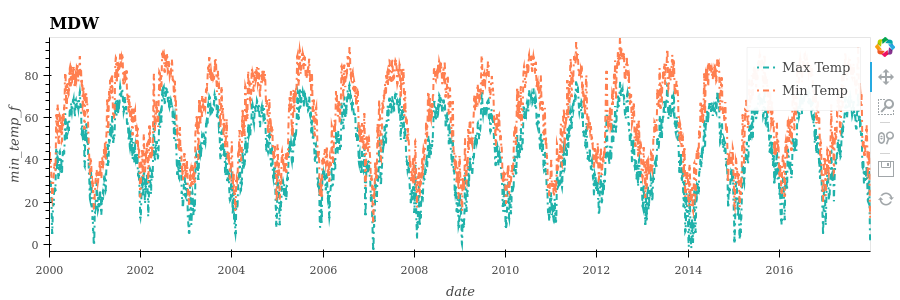

In [19]:
%%output fig='png' filename='outputs/midway_temperature'
curves.clone()

Here we have requested PNG format using ``fig='png'`` and that the output is output to outputs/midway_temperature.png using ``filename='midway_temperature'``:

In [20]:
!ls outputs/*.png

outputs/midway_temperature.png


Bokeh also has some SVG support, but it is not yet exposed in HoloViews.

## Onwards

We have now seen some of the ways you can customize the appearance of your visualizations. You can consult [Customizing Plots](http://holoviews.org/user_guide/Customizing_Plots.html) user guide to learn about other approaches, including the ``hv.opts`` and ``hv.output`` utilities which do not rely on notebook specific syntax. One last approach worth mentioning is the ``.opts`` method which accepts a customization specification dictionary or string to customize a particular object directly. When called without any arguments ``.opts()`` clears any customizations that may be set on that object.
 
In the [exploration with containers](./03-exploration-with-containers.ipynb) section that follows, you will also see a few examples of how the appearance of elements can be customized when viewed in containers.
